# Vizualizáció

Python alatt több vizualizációs könyvtár is elérhető, rendkívül gazdag lehetőségekkel.
Szinte nincs olyan ábrázolási mód, amit nem lehet azonnal megvalósítani egy már létező eszközzel.

A HTML oldalakba épített interaktív vizualizáció azonban legtöbbször részben vagy egészben javascript-re épül, az interaktív vizualizáció nyelve a javascript.

Vizualizációs környezetek:
* matplotlib: az alap python plot könyvtár. Nagyon sok lehetőséggel, de gyakran kissé (vagy nagyon) komplikált a használata. Képes nem csak file-ba írni vagy felugró ablakba tenni a kimenetét, hanem notebook-ba is ágyazni azt.
* bokeh: python-ból kényelmesen használható interaktív plot környezet. A grafikonok nagyíthatók, mozgathatók az egér kurzorral.
* seaborn: kifejezetten adatelemzés céljára fejlesztett plot környezet. Hisztogrammok rajzolásához, korrelációanalízishez, úgy általában a vizuális exploráció nagyon könnyen használható eszköze.
* plotly: javascript alapú interaktív plot környezet. Önálló (nem függ a python-tól), és sokak szerint jobb, mint a bokeh.
* leaflet: térképek, geografikus adatok vizualizációjához egyértelműen ez a vezető technológia.
* D3: nagyon alacsony szintű, javascript alapú vizualizációs könyvtár. Erős javascript képességeket igényel.

Az alábbiakban a matplotlib, a bokeh, a seaborn és a leaflet használatára látunk példákat.

# 1. Matplotlib

Eredetileg a matlab plot rendszerét szerették volna átültetni python-ra, a projekt azóta jóval túlnőtte a matlab képességeit.

In [1]:
import pandas as pd
import numpy as np

In [51]:
gm = pd.read_csv("data/gapminder/gapminder.csv")
# a hiányzó populáció adatok feltöltése az utolsó ismert értékkel
gm = gm.fillna(method='ffill')

In [12]:
# Első feladat: a föld népességének alakulása az idő függvényében

In [52]:
# A következő sor év szerint kiszámítja a várható élettartamot (éven belül átlagolva), 
# és a teljes lakosságot
# gm = gm.groupby("Year").agg({"life": "mean", "population": "sum"})
# Ez azonban csal. Az átlagolást súlyozva kell elvégezni, a nyagyobb lakosságszámú országok nagyobb
# súllyal számítanak. Ilyen beépített függvény nincs, lambda-t írunk hozzá
totl = gm.groupby("Year").agg({"life": lambda x: np.sum(gm.loc[x.index,"life"]*gm.loc[x.index,"population"])/np.sum(gm.loc[x.index,"population"]), "population": "sum"})
totl

,life,population
Year,,
1800,30.985652,9.592880e+08
1801,31.050232,9.592880e+08
1802,30.943077,9.592880e+08
1803,30.632512,9.592880e+08
1804,30.564837,9.592880e+08
1805,31.096901,9.592880e+08
1806,31.100798,9.592880e+08
1807,31.036669,9.592880e+08
1808,30.996606,9.592880e+08


In [22]:
import matplotlib.pyplot as plt

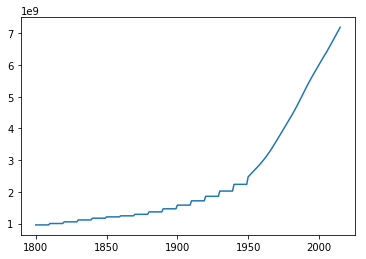

In [55]:
plt.plot(totl["population"]);

Text(0,0.5,'Lakosok száma')

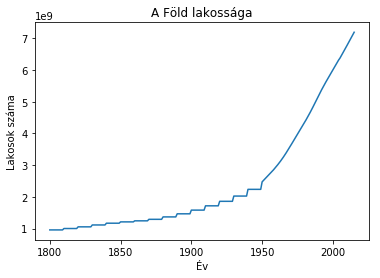

In [63]:
# Kicsit kidekoráljuk. Csinálunk hozzá főcímet, és felcimkézzük a tengelyeket
plt.plot(totl["population"])
plt.title("A Föld lakossága")
plt.xlabel("Év")
plt.ylabel("Lakosok száma")

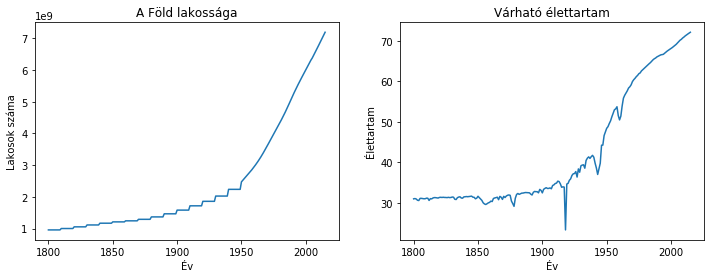

In [67]:
# most mindkét oszlopot kiplotoljuk, egymás mellett
plt.subplot("121")
plt.plot(totl["population"])
plt.title("A Föld lakossága")
plt.xlabel("Év")
plt.ylabel("Lakosok száma")
plt.subplot("122")
plt.plot(totl["life"])
plt.title("Várható élettartam")
plt.xlabel("Év")
plt.ylabel("Élettartam")
plt.gcf().set_size_inches(12, 4)

In [84]:
# most régiónként számoljuk ki az adatokat, és egy ábrában rajzoljuk ki
reg = gm.groupby(["Year","region"]).agg({"life": lambda x: np.sum(gm.loc[x.index,"life"]*gm.loc[x.index,"population"])/np.sum(gm.loc[x.index,"population"]), "population": "sum"})
reg

life    population
Year region                                             
1800 America                     33.476687  4.408431e+07
     East Asia & Pacific         32.054336  4.080189e+08
     Europe & Central Asia       34.039748  2.126332e+08
     Middle East & North Africa  29.966655  2.288663e+07
     South Asia                  25.694156  2.094323e+08
     Sub-Saharan Africa          29.961586  6.223265e+07
1801 America                     33.477673  4.408431e+07
     East Asia & Pacific         32.054366  4.080189e+08
     Europe & Central Asia       34.360638  2.126332e+08
     Middle East & North Africa  29.966655  2.288663e+07
     South Asia                  25.693996  2.094323e+08
     Sub-Saharan Africa          29.860309  6.223265e+07
1802 America                     33.478659  4.408431e+07
     East Asia & Pacific         32.054395  4.080189e+08
     Europe & Central Asia       34.227793  2.126332e+08
     Middle East & North Africa  29.966655  2.288663e+07
     South Asia                  25.337742  2.094323e+08
     Sub-Saharan Africa          29.860472  6.223265e+07
1803 America                     33.479645  4.408431e+07
     East Asia & Pacific         32.054425  4.080189e+08
     Europe & Central Asia       33.589645  2.126332e+08
     Middle East & North Africa  29.966655  2.288663e+07
     South Asia                  24.532667  2.094323e+08
     Sub-Saharan Africa          29.962075  6.223265e+07
1804 America                     33.480631  4.408431e+07
     East Asia & Pacific         32.054455  4.080189e+08
     Europe & Central Asia       33.680582  2.126332e+08
     Middle East & North Africa  29.966655  2.288663e+07
     South Asia                  24.130050  2.094323e+08
     Sub-Saharan Africa          29.962238  6.223265e+07
...                                    ...           ...
2011 America                     76.483995  9.380511e+08
     East Asia & Pacific         75.181642  2.134899e+09
     Europe & Central Asia       76.352803  8.739498e+08
     Middle East & North Africa  74.682657  3.687596e+08
     South Asia                  65.786821  1.651896e+09
     Sub-Saharan Africa          59.872781  8.941620e+08
2012 America                     76.576404  9.476839e+08
     East Asia & Pacific         75.385339  2.149939e+09
     Europe & Central Asia       76.688577  8.770186e+08
     Middle East & North Africa  74.890660  3.758694e+08
     South Asia                  66.156044  1.674977e+09
     Sub-Saharan Africa          60.363328  9.187252e+08
2013 America                     76.657940  9.571683e+08
     East Asia & Pacific         75.559614  2.164953e+09
     Europe & Central Asia       76.946295  8.800034e+08
     Middle East & North Africa  74.992890  3.829017e+08
     South Asia                  66.467288  1.697994e+09
     Sub-Saharan Africa          60.928932  9.438463e+08
2014 America                     76.739187  9.665408e+08
     East Asia & Pacific         75.733754  2.179646e+09
     Europe & Central Asia       77.204917  8.828282e+08
     Middle East & North Africa  75.100646  3.898955e+08
     South Asia                  66.779380  1.720957e+09
     Sub-Saharan Africa          61.500020  9.694901e+08
2015 America                     76.820231  9.758269e+08
     East Asia & Pacific         75.907975  2.193847e+09
     Europe & Central Asia       77.465357  8.854358e+08
     Middle East & North Africa  75.210906  3.968774e+08
     South Asia                  67.092447  1.743865e+09
     Sub-Saharan Africa          62.076654  9.956284e+08

[1296 rows x 2 columns]

In [85]:
# a plotolás előtt kicsit átrendezzük a táblát
reg = reg.unstack()
reg

life                                            \
region    America East Asia & Pacific Europe & Central Asia   
Year                                                          
1800    33.476687           32.054336             34.039748   
1801    33.477673           32.054366             34.360638   
1802    33.478659           32.054395             34.227793   
1803    33.479645           32.054425             33.589645   
1804    33.480631           32.054455             33.680582   
1805    33.481891           32.054484             34.540835   
1806    33.483151           32.054514             34.558208   
1807    33.484411           32.054543             34.268686   
1808    33.485671           32.054573             34.087736   
1809    33.486931           32.054602             34.164082   
1810    33.632520           32.052427             34.579727   
1811    33.633943           32.052455             34.492354   
1812    33.635366           32.052482             34.056362   
1813    33.636789           32.052510             34.048350   
1814    33.638212           32.052538             33.771126   
1815    33.639231           32.052566             34.772148   
1816    33.640250           32.052594             35.220434   
1817    33.641269           32.052622             35.182639   
1818    33.642288           32.052649             35.001496   
1819    33.643307           32.052677             34.814963   
1820    33.832261           32.048987             35.255790   
1821    33.836392           32.049079             35.330386   
1822    33.840523           32.049172             35.147443   
1823    33.844654           32.049265             35.356049   
1824    33.848785           32.049357             35.147508   
1825    33.846856           32.049384             35.122625   
1826    33.844928           32.049410             34.967167   
1827    33.842999           32.049436             35.299727   
1828    33.841071           32.049463             35.020830   
1829    33.839142           32.049489             35.170915   
...           ...                 ...                   ...   
1986    71.518241           67.416024             72.208923   
1987    71.742034           67.774158             72.435883   
1988    71.884829           68.051151             72.536697   
1989    72.160898           68.291688             72.567499   
1990    72.437555           68.569666             72.563693   
1991    72.684330           68.846844             72.551033   
1992    72.863698           69.102019             72.329527   
1993    72.905767           69.380497             71.870999   
1994    73.093545           69.709386             71.671776   
1995    73.290314           69.966740             71.843653   
1996    73.631835           70.242787             72.353846   
1997    74.018399           70.593894             72.882655   
1998    74.163015           70.906806             73.190420   
1999    74.415229           71.222523             73.112151   
2000    74.657462           71.563127             73.245770   
2001    74.809818           71.895731             73.408276   
2002    74.978733           72.271443             73.570530   
2003    75.122004           72.656730             73.786341   
2004    75.383648           72.866644             74.069638   
2005    75.571708           73.413090             74.258280   
2006    75.754793           73.805927             74.686814   
2007    75.938328           74.215823             75.052104   
2008    76.007976           74.288618             75.322604   
2009    76.067689           74.765246             75.652451   
2010    75.960046           75.020992             75.997438   
2011    76.483995           75.181642             76.352803   
2012    76.576404           75.385339             76.688577   
2013    76.657940           75.559614             76.946295   
2014    76.739187           75.733754             77.204917   
2015    76.820231           75.907975       

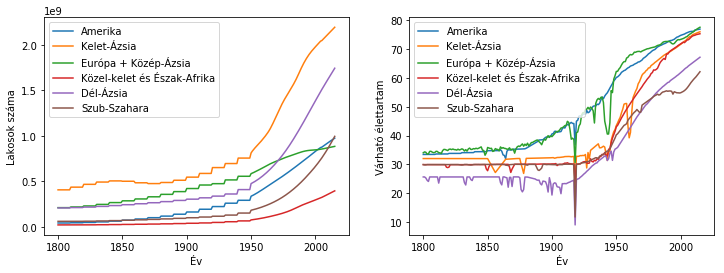

In [99]:
# Ábrázoljuk és kidekoráljuk
plt.subplot("121")
plt.plot(reg["population"])
plt.xlabel("Év")
plt.ylabel("Lakosok száma");
plt.legend(["Amerika","Kelet-Ázsia","Európa + Közép-Ázsia", "Közel-kelet és Észak-Afrika", "Dél-Ázsia", "Szub-Szahara"])
plt.subplot("122")
plt.plot(reg["life"])
plt.xlabel("Év")
plt.ylabel("Várható élettartam");
plt.legend(["Amerika","Kelet-Ázsia","Európa + Közép-Ázsia", "Közel-kelet és Észak-Afrika", "Dél-Ázsia", "Szub-Szahara"])
plt.gcf().set_size_inches(12, 4)

In [132]:
# most régiónként számoljuk ki az adatokat, és egy ábrában rajzoljuk ki
sbdta = gm[(gm["Year"]==2015) | (gm["Year"]==1950) | (gm["Year"]==1900)].groupby(["Year","region"])["population"].sum()
sbdta = sbdta.unstack()  
sbdta

region,America,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
Year,,,,,,
1900,164821160.0,5.475646e+08,422636417.0,41044803.0,3.057449e+08,101786939.0
1950,337745940.0,8.129170e+08,585948503.0,77715299.0,4.763240e+08,184020165.0
2015,975826928.0,2.193847e+09,885435846.0,396877422.0,1.743865e+09,995628371.0


Text(0,0.5,'Lakosok száma')

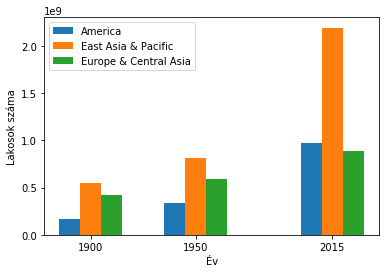

In [148]:
plt.bar(sbdta.index-10, sbdta["America"], width=10)
plt.bar(sbdta.index, sbdta["East Asia & Pacific"], width=10)
plt.bar(sbdta.index+10, sbdta["Europe & Central Asia"], width=10)
plt.legend(["America", "East Asia & Pacific", "Europe & Central Asia"])
plt.xticks(sbdta.index)
plt.xlabel("Év")
plt.ylabel("Lakosok száma")

In [157]:
cntr = gm.groupby("Country").tail(1)
cntr.set_index("Country")

,Year,life,population,income,region
Country,,,,,
Afghanistan,2015,57.630,32526562.0,1925.0,South Asia
Albania,2015,76.000,2896679.0,10620.0,Europe & Central Asia
Algeria,2015,76.500,39666519.0,13434.0,Middle East & North Africa
Andorra,2015,84.100,70473.0,46577.0,Europe & Central Asia
Angola,2015,61.000,25021974.0,7615.0,Sub-Saharan Africa
Antigua and Barbuda,2015,75.200,91818.0,21049.0,America
Argentina,2015,76.200,43416755.0,17344.0,America
Armenia,2015,74.400,3017712.0,7763.0,Europe & Central Asia
Aruba,2004,75.455,98742.0,41057.0,America


Text(0,0.5,'Bevétel')

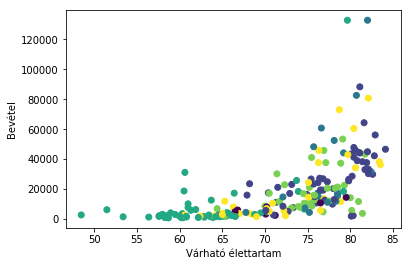

In [290]:
plt.scatter(x=cntr["life"], y=cntr["income"], c=cntr["region"].factorize()[0])
plt.xlabel("Várható élettartam")
plt.ylabel("Bevétel")

# 2. Bokeh

In [239]:
import bokeh.plotting as bk
from bokeh.io import show
bk.output_notebook()

Loading BokehJS ...

In [247]:
# egyszerű vonalplot
totl = gm.groupby("Year").agg({"life": lambda x: np.sum(gm.loc[x.index,"life"]*gm.loc[x.index,"population"])/np.sum(gm.loc[x.index,"population"]), "population": "sum"})

p = bk.figure(plot_width=500, plot_height=300)
p.line(totl.index, totl["population"])
show(p)

In [287]:
# többszörös vonalplot
reg = gm.groupby(["Year","region"])["population"].sum().unstack()

from bokeh.palettes import Spectral10
p = bk.figure(width=500, height=300, x_axis_type="datetime") 
p.multi_line(xs=[reg.index.values]*len(reg.columns), ys=[reg[name].values for name in reg], line_color=Spectral10[0:len(reg.columns)])
p.xaxis.axis_label = "Év"
p.yaxis.axis_label = "Lakosság"
show(p)

In [303]:
# példa scatter plotra
cntr = gm.groupby("Country").tail(1)
cntr.set_index("Country")

from bokeh.palettes import Spectral10
colors = Spectral10[0:len(cntr["region"].unique())]
p = bk.figure(width=500, height=300, x_axis_type="datetime")
p.circle(cntr["life"], cntr["income"], color=[colors[x] for x in cntr["region"].factorize()[0]])
p.xaxis.axis_label = "Várható élettartam"
p.yaxis.axis_label = "Bevétel"
show(p)

# 3. Seaborn

A seaborn kifejezetten adatbányászat és adatelemzés céljára készült. Magas szintű függvényhívásokat ad a leggyakoribb ábrák előállításához, hogy ne kelljen a matplotlib-bel pepecselni. Cserébe viszont, amit 
nem támogat közvetlenül, azt nem lehet vele megcsinálni.

In [2]:
import seaborn as sns

In [44]:
# betöltünk egy új adatsort, távközlési adatokból áll
dta = None
for i in range(1,31):
    tcom = pd.read_csv("data/trentotelco/sms-call-internet-tn-2013-11-{:02}.txt".format(i), delimiter="\t", header=None, names=["squareid", "timestamp", "countrycode", "smsin", "smsout", "callin", "callout", "internet"])    
    grp = tcom.groupby("timestamp")[["smsin","smsout","callin","callout","internet"]].sum()
    if dta is None:
        dta = grp
    else:
        dta = dta.append(grp)

dta.reset_index(level=0, inplace=True)
dta.to_csv("data/trentotelco/trento_aggregated.csv", index=None)

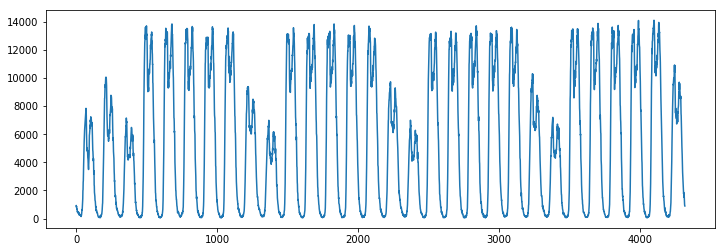

In [67]:
# először nézzük meg matplotlibbel, jól látható a napi és a heti szezonalitás, valamint a november 1-es ünnepnap hatása
plt.plot(dta["callout"])
plt.gcf().set_size_inches(12, 4)

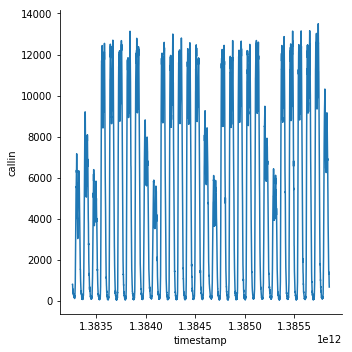

In [80]:
# egy-egy változó ábrázolása line plot-tal
sns.relplot(x="timestamp", y="callin", data=dta, kind="line")

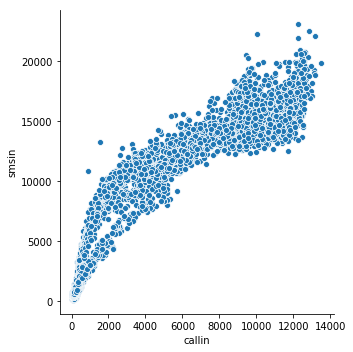

In [81]:
# két változó együttes viselkedésének ábrázolása point plot-tal
sns.relplot(x="callin", y="smsin", data=dta)

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


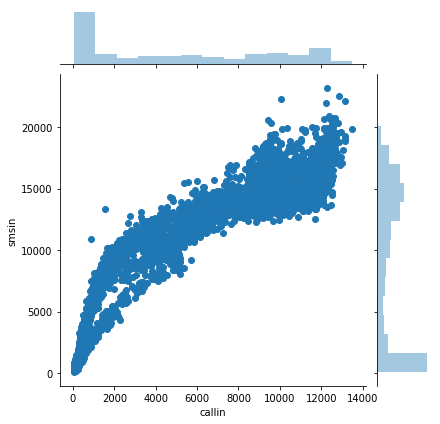

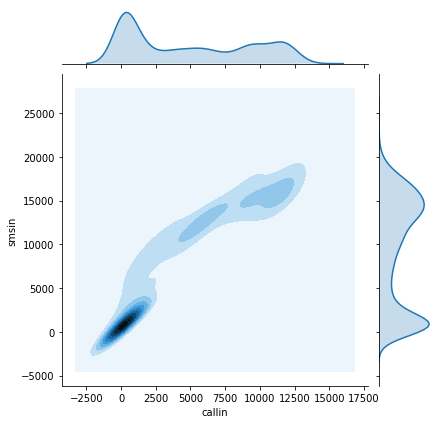

In [82]:
# együttes viselkedés ábrázolása, a szélen a perem hisztogrammokkal
sns.jointplot(x="callin", y="smsin", data=dta)
# itt illeszt rá egy folytonos függvényt, hogy jobban látszódjon, melyek a sűrű területek
sns.jointplot(x="callin", y="smsin", data=dta, kind="kde")

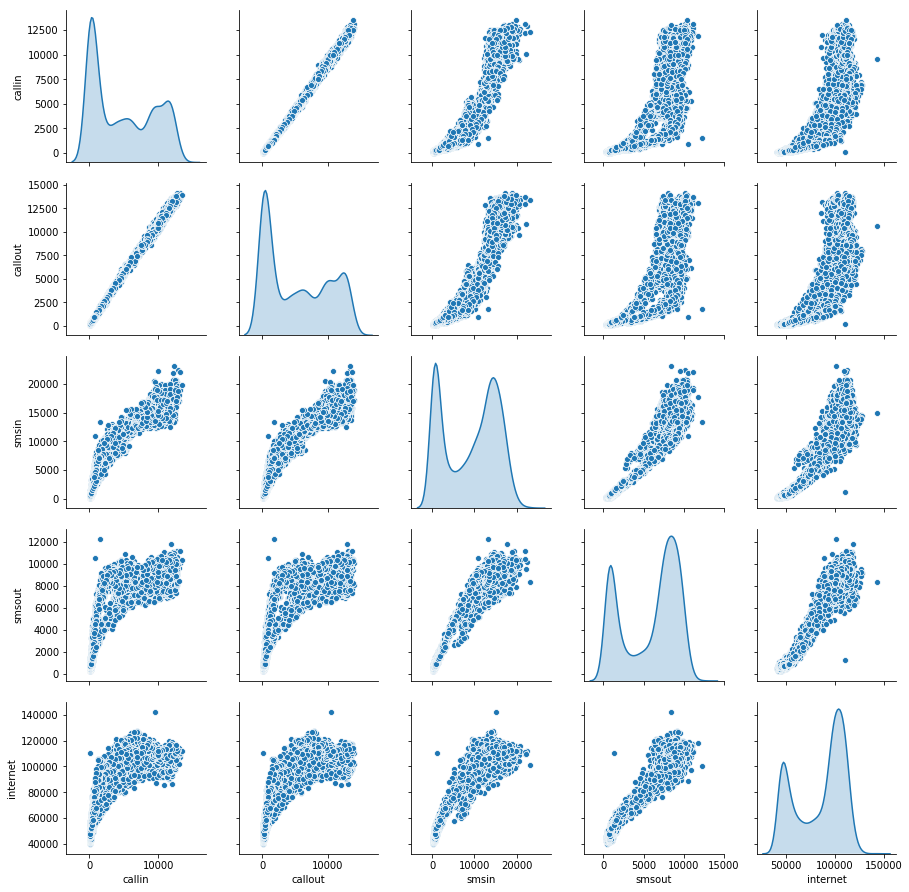

In [87]:
# az egyik leghasznosabb képesség, szinte kötelező minden adatelemzést így kezdeni
sns.pairplot(dta[["callin","callout","smsin","smsout","internet"]], diag_kind="kde")

# 4. Leaflet

In [2]:
import pandas as pd
meteo = pd.read_csv("data/meteo/stations.csv")
meteo

,address,lat,lon
0,Milano - via Brera,45.471192,9.187616
1,Milano - via Lambrate,45.490051,9.225596
2,Milano - P.zza Zavattari,45.476089,9.143509
3,Milano - via Feltre,45.491450,9.242386
4,Milano - via Filippo Juvara,45.473622,9.220392
5,Milano - via Ippolito Rosellini,45.490043,9.194632
6,Milano - viale Marche,45.496067,9.193023


In [3]:
from ipyleaflet import *

In [31]:
m = Map(center=(45.49, 9.2), zoom=13, basemap=basemaps.OpenStreetMap.Mapnik)
for i in range(meteo.shape[0]):
    m.add_layer(Marker(location=tuple(meteo.loc[i,"lat":"lon"]), title=meteo.loc[i,"address"]))
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

# 5. Networkx